In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [ ]:
file_path = '/content/environmental_data.csv'
df = pd.read_csv(file_path)
print(df.head())
print(df.info())

   Temperature (°C)  Humidity (%)  Air Quality Index  Annual Rainfall (mm)  \
0         17.440675     59.288027         405.759235           1359.094988   
1         25.759468      1.006370         238.041993           1962.931248   
2         20.138169     47.582620         261.577995           2380.035939   
3         17.244159     70.877039         125.260293           2584.361824   
4         11.182740      4.397543         302.521508           2485.955598   

   Elevation (m)  Wind Speed (km/h)   Soil pH  Daylight Hours  \
0    1246.153429          36.678022  5.248761       14.437440   
1    2505.984062          29.762418  5.572116       12.324820   
2     532.106361           6.859959  7.098340       18.771296   
3    1508.676050          35.252753  6.605687       21.289877   
4     144.795344          23.219605  3.422898        0.048286   

   Pollution Level  Biodiversity Index  
0         4.577597           63.669541  
1         3.769177           90.004557  
2         7.02335

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
linked = linkage(scaled_df, method='ward')

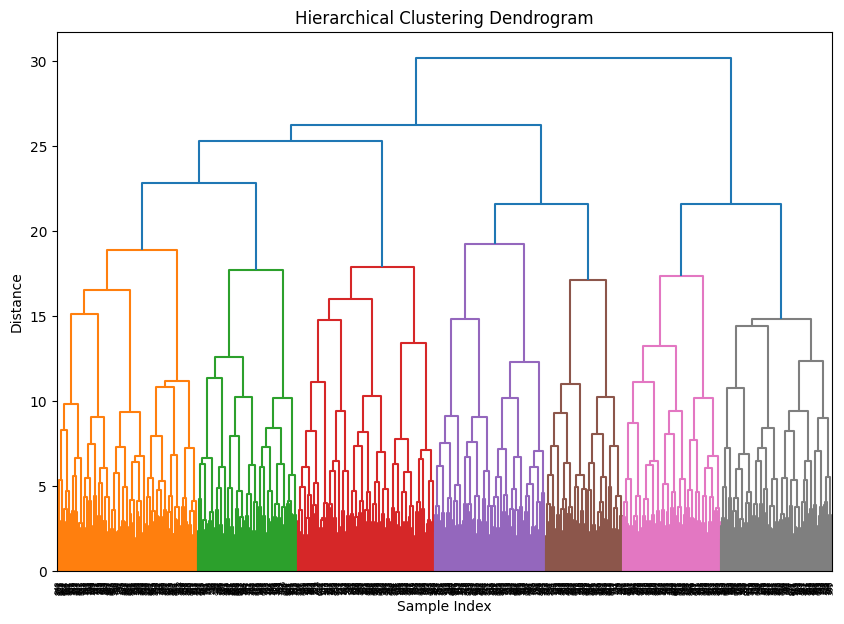

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

distance_threshold = 100
clusters = fcluster(linked, distance_threshold, criterion='distance')

df['Cluster'] = clusters
print(df.head())

   Temperature (°C)  Humidity (%)  Air Quality Index  Annual Rainfall (mm)  \
0         17.440675     59.288027         405.759235           1359.094988   
1         25.759468      1.006370         238.041993           1962.931248   
2         20.138169     47.582620         261.577995           2380.035939   
3         17.244159     70.877039         125.260293           2584.361824   
4         11.182740      4.397543         302.521508           2485.955598   

   Elevation (m)  Wind Speed (km/h)   Soil pH  Daylight Hours  \
0    1246.153429          36.678022  5.248761       14.437440   
1    2505.984062          29.762418  5.572116       12.324820   
2     532.106361           6.859959  7.098340       18.771296   
3    1508.676050          35.252753  6.605687       21.289877   
4     144.795344          23.219605  3.422898        0.048286   

   Pollution Level  Biodiversity Index  Cluster  
0         4.577597           63.669541        1  
1         3.769177           90.004557  

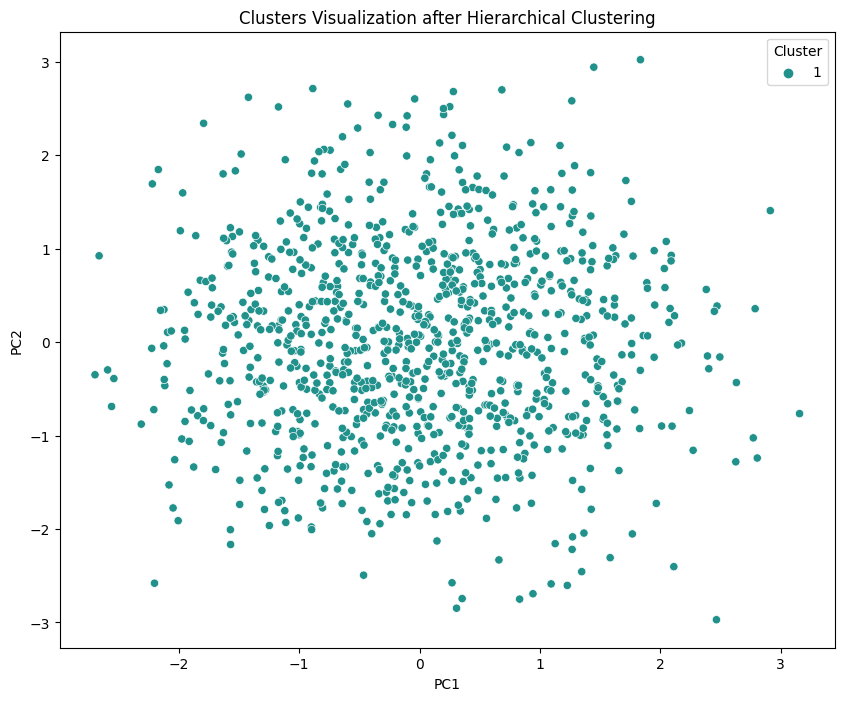

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Clusters Visualization after Hierarchical Clustering')
plt.show()